# Статистика в R - часть вторая

*Это продолжение руководства по использованию статистики в R, настоятельно рекомендуем ознакомиться с первой частью перед прочтением этого документа*

В предыдущей части мы научились сравнивать одну выборку с некоторым известным значением или с другой выборкой, т.е. мы проводили **попарное сравнениие**. Теперь рассмотрим метод, позволяющий сравнивать *множество* выборок между собой - **ANOVA**.

# ANOVA - дисперсионный анализ

ANOVA сравнивает насколько сильно отличаются **дисперсии** данных *по выборке* (внутригрупповая дисперсия) и *между выборками* (межгрупповая дисперсия).
<br>Межгрупповая дисперсия **велика** => группы действительно **различаются** по своим средним значениям.
<br>Межгрупповая дисперсия **мала** => все группы **одинаковы**

Алгоритм выполнения ANOVA можно выполнить двумя способами:

In [ ]:
# Способ I - не запускать!
mod.aov <- aov(formula = y ~ x1 + x2 + ...,       # Шаг 1: создать объект aov
               data = data)

summary(mod.aov)                                  # Шаг 2: просмотреть summary

In [ ]:
# Способ II - не запускать!
model.ANOVA <- lm(y ~ x1 + x2 + ...,              # Шаг 1: создать объект lm (линейная модель)
                  data = data)

anova(model.ANOVA)                                # шаг 2: применить функцию anova

**Обратите внимание:** в формуле *formula = y ~ x* переменная **y** должна быть **числом**, а **x** - переменной, показывающей **категорию**. Если у вас x это числовые данные, то сначала их нужно перевести в тип данных *factor*.

# Односторонний дисперсионный анализ

Проведем дисперсионный анализ на данных по пассажирам Титаника из датасета **titanic**.

In [1]:
install.packages("titanic")       # Загрузите датасет

package 'titanic' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\User\AppData\Local\Temp\RtmpKizGRm\downloaded_packages


In [3]:
library(titanic)         # Просмотр содержимого датасета
head(titanic_train)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


Давайте сгруппируем пассажиров Титаника по *номеру класса*, которым они плыли, и посмотрим есть ли внутри классов различия по *возрасту* пассажиров. Формулируем гипотезы:

**Н0:** различий по возрасту внутри классов **нет**
<br>**H1:** различия по возрасту внутри классов **есть**

Сначала построим графики, чтобы убедиться в **нормальном распределении данных** (процедура необязательная).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 177 rows containing non-finite values (stat_bin)."

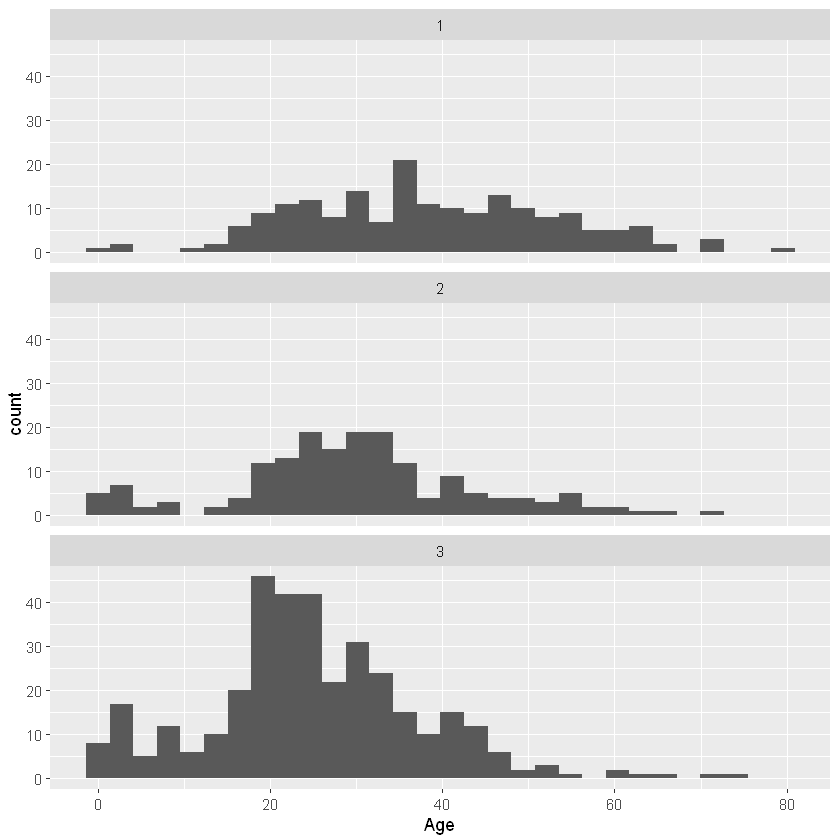

In [17]:
library(ggplot2)
ggplot(titanic_train, aes(x = Age)) + geom_histogram() + facet_wrap(~ Pclass, ncol = 1)

Распределение нормальное - применяем ANOVA:

In [33]:
titanic.aov <- aov(formula = Age ~ as.factor(Pclass),     # formula = Числовая_переменная ~ Категория
                   data = titanic_train)
summary(titanic.aov)

                   Df Sum Sq Mean Sq F value Pr(>F)    
as.factor(Pclass)   2  20930   10465   57.44 <2e-16 ***
Residuals         711 129527     182                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
177 observations deleted due to missingness

*Либо вторым способом:*

In [39]:
titanicANOVA <- lm(Age ~ as.factor(Pclass),  # Не забываем перевести численную переменную Pclass в factor!
                   data = titanic_train) 
anova(titanicANOVA)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
as.factor(Pclass),2,20929.63,10464.8139,57.44348,7.487984e-24
Residuals,711,129527.01,182.1758,NA,NA


Для оценки результатов посмотрим на P-value: она маленькая => *H0 отвергается* => отличия по возрасту людей в разных классах **присутствуют**.

Мы убедились в своей альтернативной гипотезе, но пока не знаем между какими пассажирскими классами есть различие. В этом поможет тест **Tukey method** или **Среднее Тьюки**, встроенный в R в виде функции *TukeyHSD()*.

In [44]:
TukeyHSD(aov(titanicANOVA))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = titanicANOVA)

$`as.factor(Pclass)`
          diff        lwr        upr     p adj
2-1  -8.355811 -11.704133  -5.007489 0.0000000
3-1 -13.092821 -15.962198 -10.223445 0.0000000
3-2  -4.737010  -7.676279  -1.797742 0.0004884


Для анализа результатов посмотрим на получившуюся таблицу, где каждая строка представляет попарное сравнение классов, которыми путешествовали пассажиры: 2-1, 3-1 и 3-2. Столбик *diff* показывает **доверительный интервал**, *lwr* и *upr* его **границы** и последний столбик отвечает за **p-value**.

P-value везде низкая => во *всех* классах в среднем **присутствует разница в возрасте** (Н0 отвергается во всех случаях).

# Двухсторонний дисперсионный анализ

Для проведения двухстороннего дисперсионного анализа просто увеличьте число переменных-категорий. 

Пример: насколько отличаются выживаемость пассажиров в зависимости от места их посадки и количества сестер/братьев, с которыми они плыли:

In [45]:
survived.or.not.ANOVA <- lm(Survived ~ Embarked + as.factor(SibSp),      # Добавляем нужные переменные
                            data = titanic_train)
anova(survived.or.not.ANOVA)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Embarked,3,7.017292,2.3390975,10.496917,8.673212e-07
as.factor(SibSp),6,7.390926,1.2318211,5.527912,1.234133e-05
Residuals,881,196.319054,0.2228366,NA,NA


In [43]:
TukeyHSD(aov(survived.or.not.ANOVA))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = survived.or.not.ANOVA)

$Embarked
           diff        lwr          upr     p adj
C-  -0.44642857 -1.3106931  0.417835989 0.5442822
Q-  -0.61038961 -1.4806417  0.259862466 0.2714327
S-  -0.66304348 -1.5235422  0.197455205 0.1950333
Q-C -0.16396104 -0.3311759  0.003253841 0.0569852
S-C -0.21661491 -0.3218771 -0.111352736 0.0000009
S-Q -0.05265387 -0.1991652  0.093857465 0.7914524

$`as.factor(SibSp)`
             diff         lwr        upr     p adj
1-0  1.789126e-01  0.06705618 0.29076905 0.0000544
2-0  1.129565e-01 -0.15667624 0.38258924 0.8791620
3-0 -4.927025e-02 -0.40257981 0.30403931 0.9996227
4-0 -1.443044e-01 -0.47794128 0.18933240 0.8619415
5-0 -2.992702e-01 -0.92569415 0.32715365 0.7955414
8-0 -2.992702e-01 -0.82955803 0.23101754 0.6378596
2-1 -6.595611e-02 -0.34669132 0.21477910 0.9929197
3-1 -2.281829e-01 -0.59003654 0.13367083 0.5053085
4-1 -3.232171e-01 -0.66588888 0.01945478 

Выводы по полученным данным сделайте сами.

*Продолжение применения статистического анализа в R ищите в файле **R statistics III**!*